In [1]:
# Import libraries and load the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf


In [2]:
#Load Data Set

df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
Diabetes_binary         70692 non-null int64
HighBP                  70692 non-null int64
HighChol                70692 non-null int64
CholCheck               70692 non-null int64
BMI                     70692 non-null int64
Smoker                  70692 non-null int64
Stroke                  70692 non-null int64
HeartDiseaseorAttack    70692 non-null int64
PhysActivity            70692 non-null int64
Fruits                  70692 non-null int64
Veggies                 70692 non-null int64
HvyAlcoholConsump       70692 non-null int64
AnyHealthcare           70692 non-null int64
NoDocbcCost             70692 non-null int64
GenHlth                 70692 non-null int64
MentHlth                70692 non-null int64
PhysHlth                70692 non-null int64
DiffWalk                70692 non-null int64
Sex                     70692 non-null int64
Age                     70692 non-nu

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


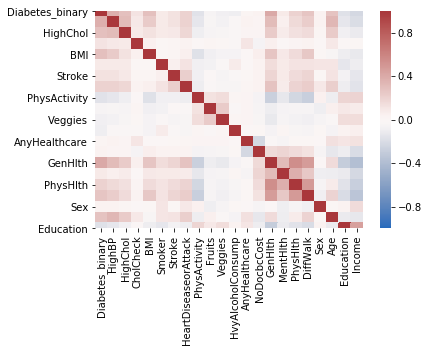

In [6]:
# Check correlation between variables and plot correlations with heatmap
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=False, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

In [7]:
# Defining features 

feature_cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI','Smoker','Stroke','HeartDiseaseorAttack', 'PhysActivity', 'AnyHealthcare',
               'GenHlth', 'MentHlth', 'Sex', 'Age', 'Education', 'Income']

X = df[feature_cols] # Features
y = df.Diabetes_binary # Target variable

In [8]:
# Splitting the data set into test and training set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# Instantiate the model, fit the model, and predict results

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

C:\Users\snazz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
# Create a confusion matrix to evaluate model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6309, 2380],
       [2075, 6909]], dtype=int64)

In [11]:
# Determine model accuracy, precision, and recall

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7479205567815311
Precision: 0.7437829691032404
Recall: 0.7690338379341051


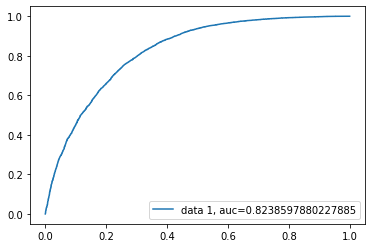

In [12]:
# ROC Curve Check

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [13]:
# Summarize and display result

reg = smf.logit('Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + AnyHealthcare + GenHlth + MentHlth + Sex + Age + Education + Income', data=df).fit()
print(reg.summary())

Optimization terminated successfully.
         Current function value: 0.514226
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:                70692
Model:                          Logit   Df Residuals:                    70676
Method:                           MLE   Df Model:                           15
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.2581
Time:                        11:48:52   Log-Likelihood:                -36352.
converged:                       True   LL-Null:                       -49000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -6.9275      0.121    -57.070      0.000      -7.165      -6.690

INTERPRETATION:

Twelve of the fifteen explanatory variables are statistically significant at the .05 level. Of the twelve statistically significant variables, nine have a positive relationship with diabetes, inlcuding incidence of high blood pressure and heart disease or attack. Interestingly, getting a cholesterol check within the past year had the strongest positive relationship with diabetes, which is likely a function of the frequency of checkups among those with chonic diseases (such as diabetes) in comparison to the population without chonic illnesses.   

In [14]:
# Calculate odds ratio for explanatory variables
np.exp(reg.params)

Intercept               0.000980
HighBP                  2.070691
HighChol                1.797326
CholCheck               3.900852
BMI                     1.080685
Smoker                  0.971614
Stroke                  1.185129
HeartDiseaseorAttack    1.298076
PhysActivity            0.961711
AnyHealthcare           1.065289
GenHlth                 1.766898
MentHlth                0.993620
Sex                     1.308681
Age                     1.167641
Education               0.957863
Income                  0.936864
dtype: float64

INTERPRETATION:

Based on the cell above, those with high blood pressure have 2.07 times higher odds of suffering from diabetes, all other factors controlled for. Unsurprisingly, respondents who reported participating in physical activites within the prior 30 days had .97 times lower odds of having diabetes, all else controlled. As respondent education and income increase, they are .95 and .93 times lower odds to be diabetic, all other factors held constant. Respondent age had the opposite relationship with diabetes, as older age groups had 1.16 times greater odds be affected than younger age groups.   

In [15]:
# Display Odds ratio and confidence intervals for variables
params = reg.params
conf = reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                            5%       95%  Odds Ratio
Intercept             0.000773  0.001244    0.000980
HighBP                1.992410  2.152048    2.070691
HighChol              1.732313  1.864778    1.797326
CholCheck             3.328160  4.572091    3.900852
BMI                   1.077384  1.083996    1.080685
Smoker                0.936628  1.007907    0.971614
Stroke                1.094273  1.283528    1.185129
HeartDiseaseorAttack  1.228051  1.372094    1.298076
PhysActivity          0.923224  1.001802    0.961711
AnyHealthcare         0.973049  1.166273    1.065289
GenHlth               1.731326  1.803201    1.766898
MentHlth              0.991223  0.996023    0.993620
Sex                   1.261000  1.358166    1.308681
Age                   1.158934  1.176412    1.167641
Education             0.938985  0.977120    0.957863
Income                0.927590  0.946230    0.936864
